# Crime in Los Angeles from 2010-2017

Group Members:
- Gabriella DePietro UID: 116021319
- Flora Chan UID: 116557047
- Anjali Devagupta UID: 116076265

Dataset is retrieved from: https://www.kaggle.com/datasets/cityofLA/crime-in-los-angeles?resource=download

## Introduction

### Why is this type of data important? 
It's crucial information for datasets recording crime to be analyzed to have a concrete overview of crime within a state. In our case, from 2010-2017, which areas have the most crime in California? What types of crimes are happening? All of these questions are essential for law makers and law enforcement to know and watch out for to decrease crime rate over time. Without having this type of analysis, there is no evidence or motive to address these crimes happening within the state. Drawing conclusions and patterns from these division records are what help create a safer communities for those who live in Los Angeles. 

Throughout this tutorial, we will be parsing and visualizing crimes reported to pinpoint specific trends in the data. 

## Data Collection and Parsing

Prior to the data collection, we'll need to import the required modules that will help us analyze, breakdown, and visualize the data. 

In [202]:
import pandas as pd
import numpy as np

After registering the necessary modules, to read the data we'll need the package "Pandas". 

In the following snippet, we'll use this module to read the csv file and convert our data to a DataFrame. While our data is derived from Kaggle, we had downloaded the CSV as an external file for use. 

In [203]:
crime_data = pd.read_csv("Crime_Data_2010_2017.csv", sep=',')
crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


We'll then notice the details provided in this dataset: 

- DR number, Division of Records Number
- Date Reported
- Date Occurred
- Time Occurred
- Area ID
- Area Name
- Reporting District
- Crime Code
- Crime Code Description
- MO Codes
- Weapon Description
- Status Code
- Status Description
- Crime Code 1 
- Crime Code 2 
- Crime Code 3 
- Crime Code 4
- Address
- Cross Street
- Location

One thing that is noticeable is that data entries are not in sequential order. Our first one starts in 2013, but immediately the next entry is from 2010. To organize the dataframe from the earliest "Date Occurred" to the latest "Date Occurred" we can do the following command. 


In [204]:
sorted_crime_data = crime_data.sort_values(by = ['Date Occurred'])
sorted_crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
320224,121907264,02/25/2012,01/01/2010,900,19,Mission,1924,354,THEFT OF IDENTITY,0377,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,15100 PADDOCK ST,NaN,"(34.2954, -118.4612)"
319675,120125557,12/19/2012,01/01/2010,1200,1,Central,153,354,THEFT OF IDENTITY,0377,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)"
260478,100628947,12/03/2010,01/01/2010,800,6,Hollywood,649,354,THEFT OF IDENTITY,0377,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1600 N NORMANDIE AV,NaN,"(34.1004, -118.3005)"
319676,120126065,12/28/2012,01/01/2010,1200,1,Central,174,354,THEFT OF IDENTITY,0377,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,700 S MAIN ST,NaN,"(34.0439, -118.2514)"
319677,120204097,01/02/2012,01/01/2010,1,2,Rampart,248,121,"RAPE, FORCIBLE",1259 0500,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,121.0,NaN,NaN,NaN,300 WITMER ST,NaN,"(34.0591, -118.2635)"


## Crime Frequency

Another component to data processing, is understanding the scope of our dataset. Our entire dataset spans over seven years, in all areas of California. However, one area will have more crimes than another, and the types of crimes will vary as well. If we only take account and draw analysis from the state as a whole, one city can cause a skew in our conclusions. 

Let's see what types of Areas are utilized in this dataset.

In [205]:
areas = sorted_crime_data['Area Name'].unique()
print(*areas, sep='\n')

Mission
Central
Hollywood
Rampart
Southeast
Devonshire
Southwest
77th Street
Topanga
Olympic
Foothill
Pacific
Newton
Hollenbeck
Northeast
N Hollywood
Wilshire
Van Nuys
West Valley
West LA
Harbor


From each of these areas, we'll want to have a separate dataframe containing crimes from their own areas. To do this, we'll utilize Pandas' groupby function that allows us to sort our dataframe depending on a certain column. 

We can pass in the values that we want our dataframe to be sorted by, and `area_crimes` becomes a GroupBy object. 

In [206]:
area_crimes = sorted_crime_data.groupby(sorted_crime_data['Area Name'])
area_crimes

How do we take a look at the dataframes for each area? Within this object we can see the dataframe using the `get_group` like this for Hollywood's crime records:

From a high level overview, we'll examine some surface level conclusions we can draw from our dataframe. 

Ranging from, how many reports are made from 2010-2017? From the snippet below, we iterate over the list of our area names, and push it through `get_group`. This essentially retrieves the dataframes we separated for each area, and we'll call `len` to take the number of rows (which signify the number of crimes that happen in this area). 

While we are displaying these values, we'll also store it as an array for plotting purposes. 

In [207]:
areas_frequency = []

for area in areas: 
    area_crime_df = area_crimes.get_group(area)
    areas_frequency.append(len(area_crime_df.index))
    print("Area: ", area,"Number of Crimes: ", len(area_crime_df.index))

Area:  Mission Number of Crimes:  80249
Area:  Central Number of Crimes:  67096
Area:  Hollywood Number of Crimes:  72239
Area:  Rampart Number of Crimes:  67010
Area:  Southeast Number of Crimes:  83517
Area:  Devonshire Number of Crimes:  74013
Area:  Southwest Number of Crimes:  102259
Area:  77th Street Number of Crimes:  110605
Area:  Topanga Number of Crimes:  73291
Area:  Olympic Number of Crimes:  70133
Area:  Foothill Number of Crimes:  60939
Area:  Pacific Number of Crimes:  83763
Area:  Newton Number of Crimes:  74385
Area:  Hollenbeck Number of Crimes:  57592
Area:  Northeast Number of Crimes:  76627
Area:  N Hollywood Number of Crimes:  86405
Area:  Wilshire Number of Crimes:  63598
Area:  Van Nuys Number of Crimes:  75456
Area:  West Valley Number of Crimes:  67797
Area:  West LA Number of Crimes:  66388
Area:  Harbor Number of Crimes:  70954


An even better way to represent this list is through a bar chart. In order to do this, we'll have to utilize a different module, matplotlib.pyplot. 

In [208]:
import matplotlib.pyplot as plt

Then to create a bar plot, we can simply call `plt.bar` with the x and y values as the parameters. Our x-axis in this case will represent the Areas where crime was reported in Los Angeles, and the y-axis will represent the frequency. For these values we'll take the arrays that we made earlier: `areas` and `areas_frequency`

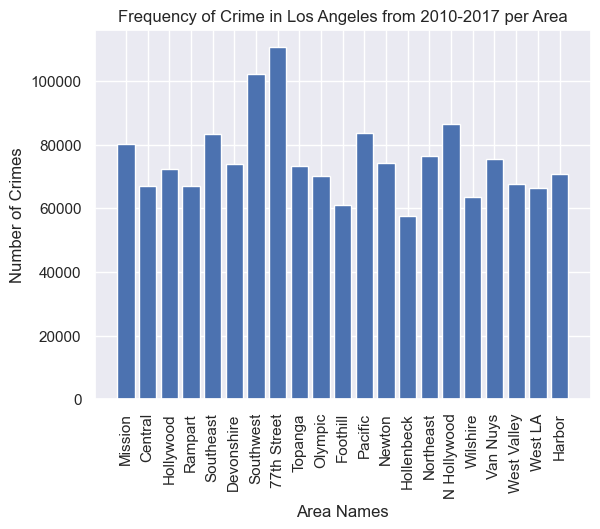

In [209]:
plt.figure()
plt.title("Frequency of Crime in Los Angeles from 2010-2017 per Area")
plt.xlabel("Area Names")
plt.ylabel("Number of Crimes")
plt.bar(areas, areas_frequency)
plt.xticks(rotation=90)
plt.show()

From here, we can plot many different graphs from fthe `matplotlib.pyplot` lib. We see that the bar graph only scopes for the entire 2010-2017 time period, but what about over time in each area? 

Does crime increase/worsen? Or does it decrease/improve? 

We can test this hypothesis by creating line graphs over time for each graph. 

However, prior to constructing these graphs, we'll need to do some data processing. Currently, we know that the years placed in the dataset are in the format `mm/dd/yyyy`. We can clean up the data since we want to only look at the year, by parsing this column and adding the `yyyy` to a new column called `Year`.

In [210]:
sorted_crime_data['Year'] = sorted_crime_data['Date Reported'].map(lambda x: x[-4:])
sorted_crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Year
320224,121907264,02/25/2012,01/01/2010,900,19,Mission,1924,354,THEFT OF IDENTITY,0377,...,IC,Invest Cont,354.0,NaN,NaN,NaN,15100 PADDOCK ST,NaN,"(34.2954, -118.4612)",2012
319675,120125557,12/19/2012,01/01/2010,1200,1,Central,153,354,THEFT OF IDENTITY,0377,...,IC,Invest Cont,354.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)",2012
260478,100628947,12/03/2010,01/01/2010,800,6,Hollywood,649,354,THEFT OF IDENTITY,0377,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1600 N NORMANDIE AV,NaN,"(34.1004, -118.3005)",2010
319676,120126065,12/28/2012,01/01/2010,1200,1,Central,174,354,THEFT OF IDENTITY,0377,...,IC,Invest Cont,354.0,NaN,NaN,NaN,700 S MAIN ST,NaN,"(34.0439, -118.2514)",2012
319677,120204097,01/02/2012,01/01/2010,1,2,Rampart,248,121,"RAPE, FORCIBLE",1259 0500,...,AA,Adult Arrest,121.0,NaN,NaN,NaN,300 WITMER ST,NaN,"(34.0591, -118.2635)",2012


Now that we have the year, we can start grouping our data for the plots. We'll need to update our previous frequency array as they were not grouped by year. Instead we can rename and redefine the variable by calling `groupby` again. 

In [211]:
area_crimes = sorted_crime_data.groupby(sorted_crime_data['Area Name'])['Year']

An important thing to note is our variable type once we called `groupby`. Our variable is a groupby object, but how can we access the data by year? Each entry becomes a `tuple`, and the first index will be our unique Area Name, while the second will be a Series of years for each crime committed in the area. 

Therefore for each group, if we take `area[1].unique()`, we'll receive all the years that crime has taken place for the area. Then to count for the frequency, ` area[1].value_counts().sort_index()` will take a frequency count for the index values such as 2010, 2011, 2012, 2013, 2014, 2015, 2016, and 2017. However, since the order of `value_counts()` is not sequential, we'll call `sort_index()` to have the y-values be sorted in sequential order. 

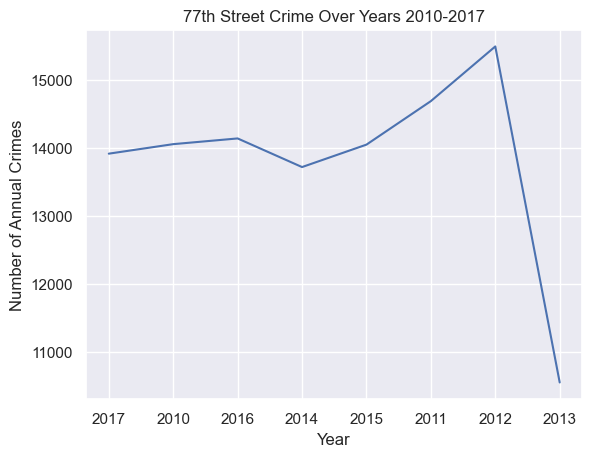

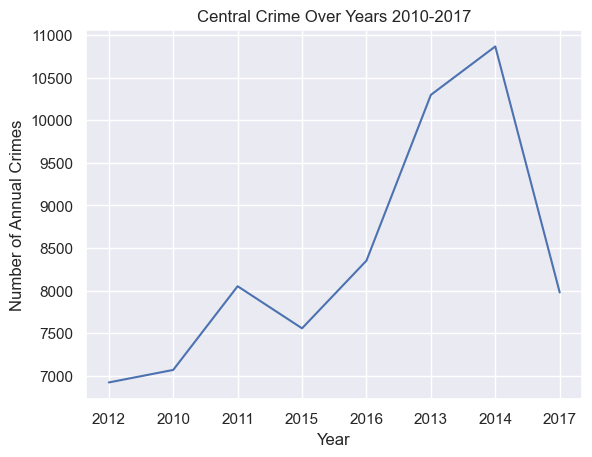

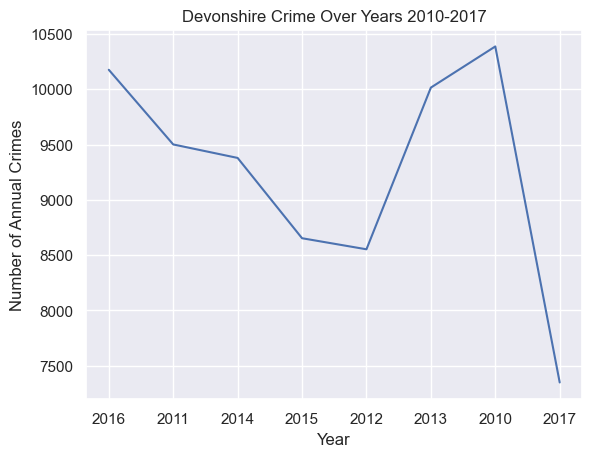

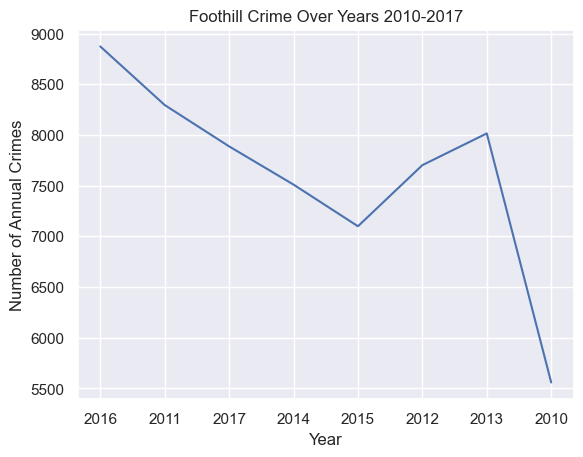

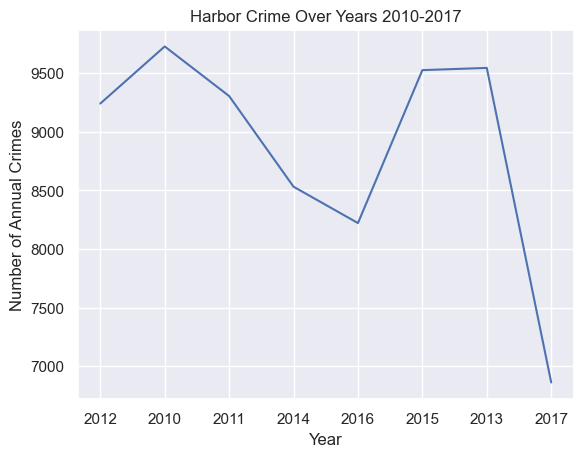

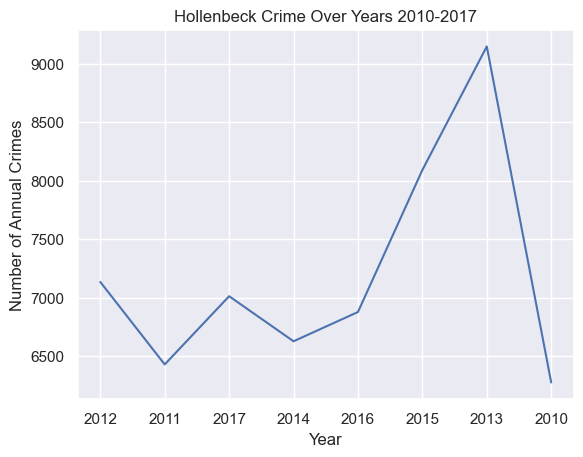

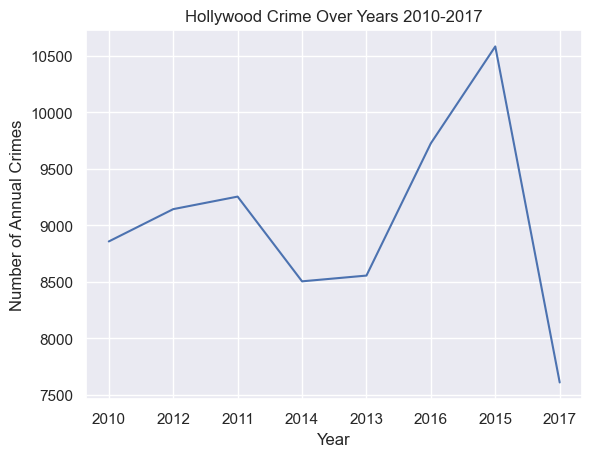

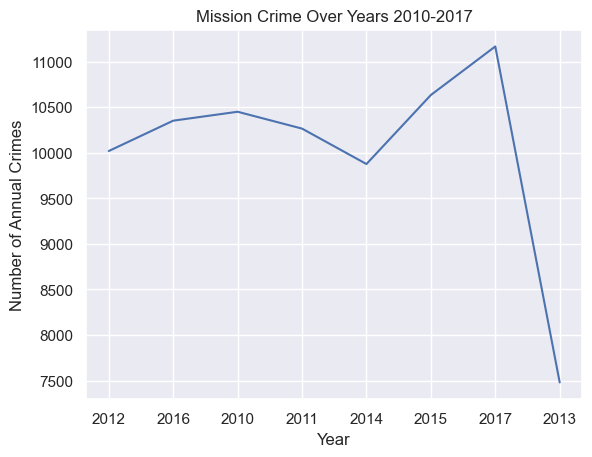

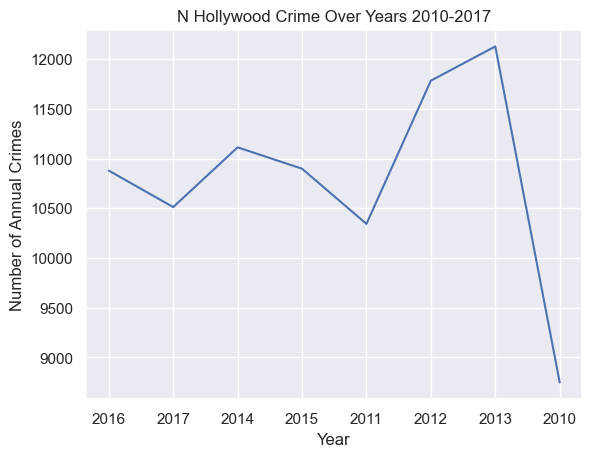

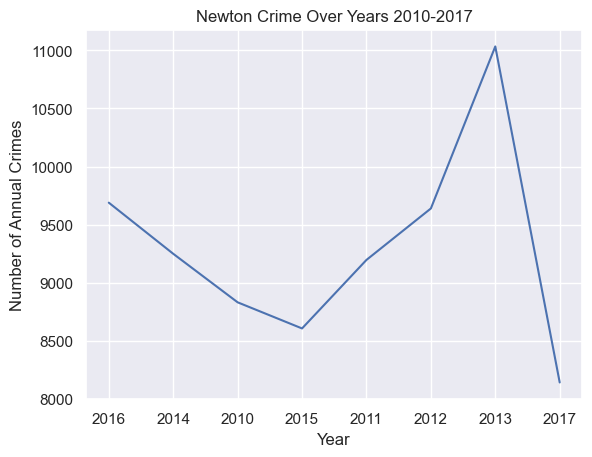

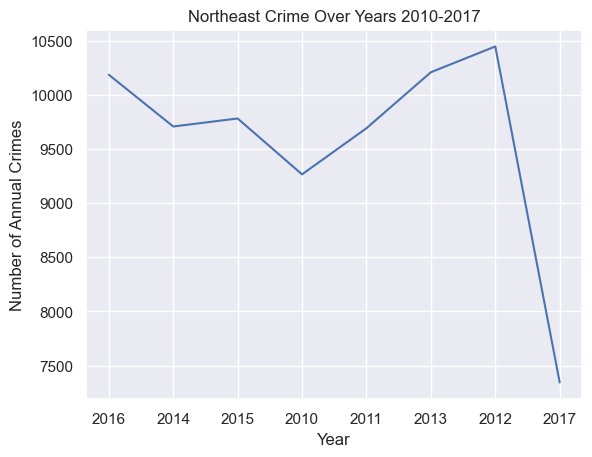

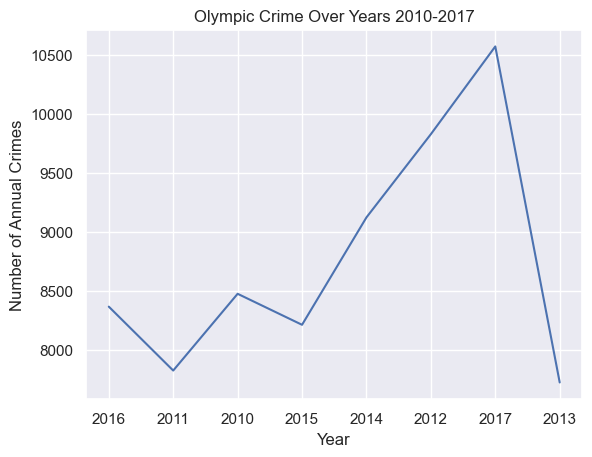

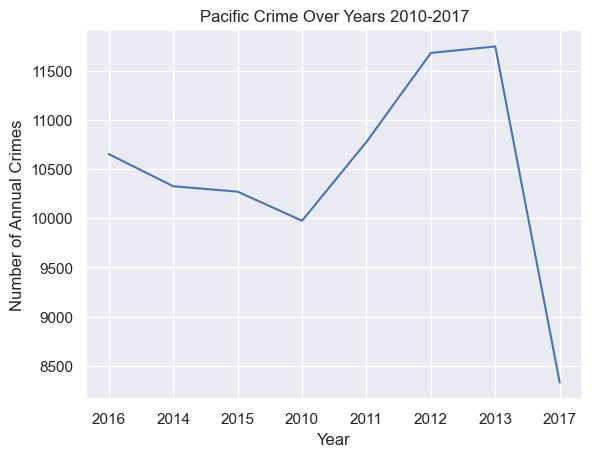

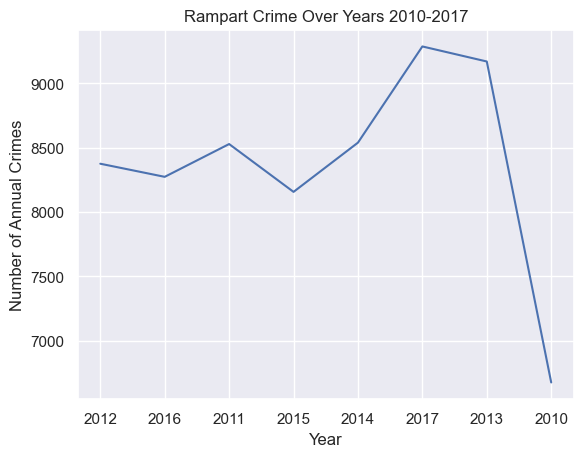

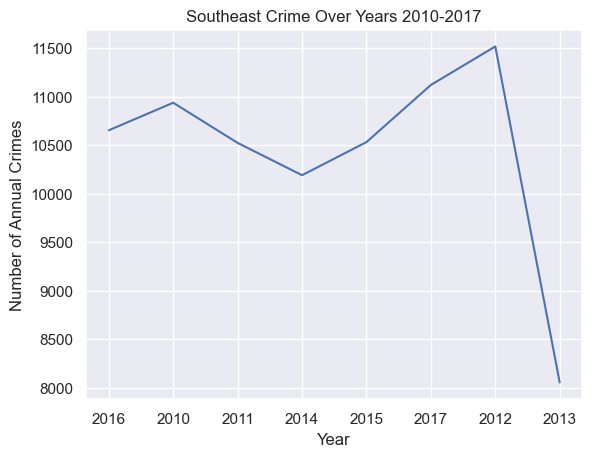

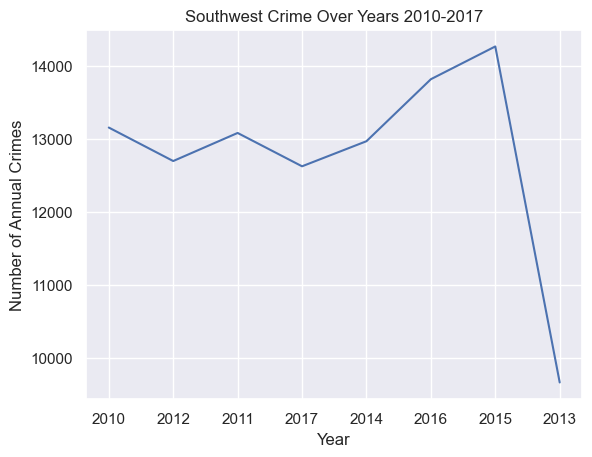

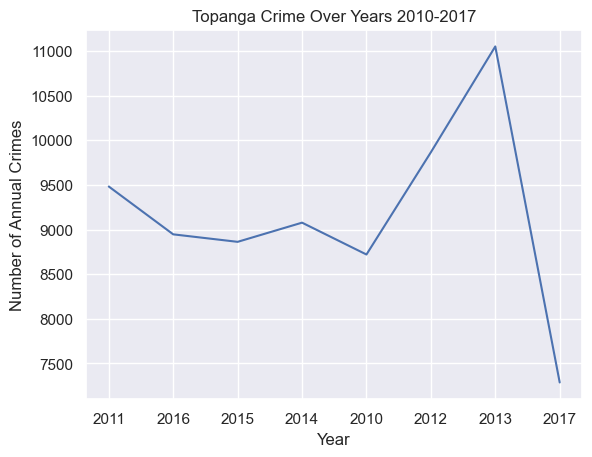

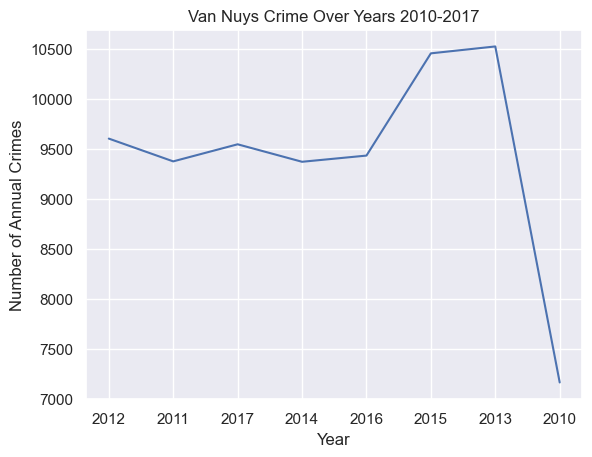

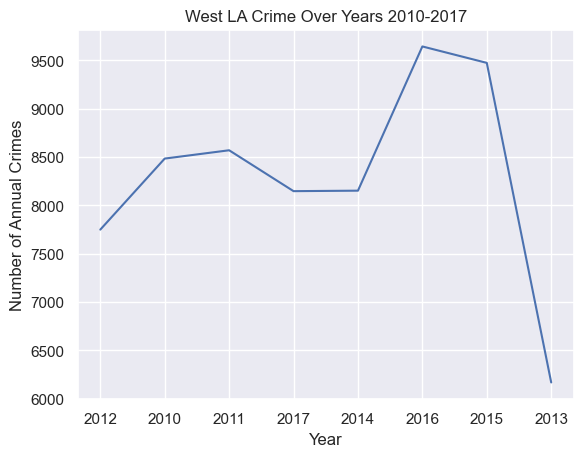

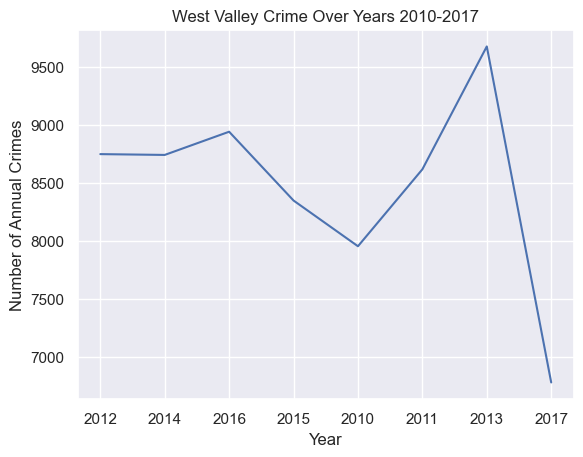

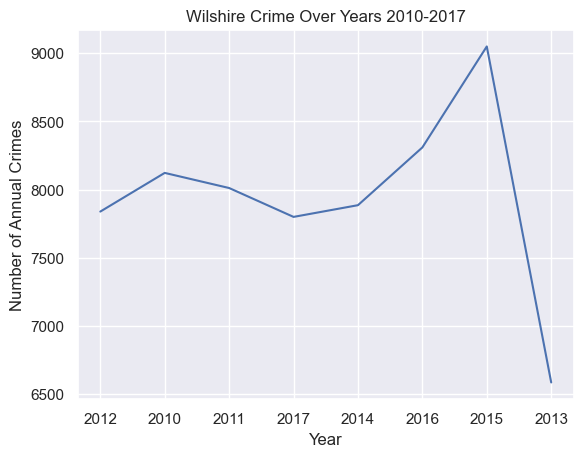

In [212]:
for area in area_crimes:
    plt.figure()
    title = area[0] + " Crime Over Years 2010-2017"
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of Annual Crimes')
    
    plt.plot(area[1].unique(), area[1].value_counts().sort_index())
    plt.show()

One point we notice from these graphs is that after the peak in crimes, there is a sudden drop illustrating that there is some type of reform happening to prevent the number of crimes from going any higher. 

From these graphs, we see that the one area that has the most crime reported is typically the 77th Street in Los Angeles. Bringing us to the next question, what types of crimes are contributing to this? While other areas range from 9000-12000 crims as their maximum, the 77th Street peaks at >15,000. 

Let's take a further look at the crimes in 77th Street. 

To organize the data, we'll first only take the rows in the DataFrame that are related to 77th Street. 

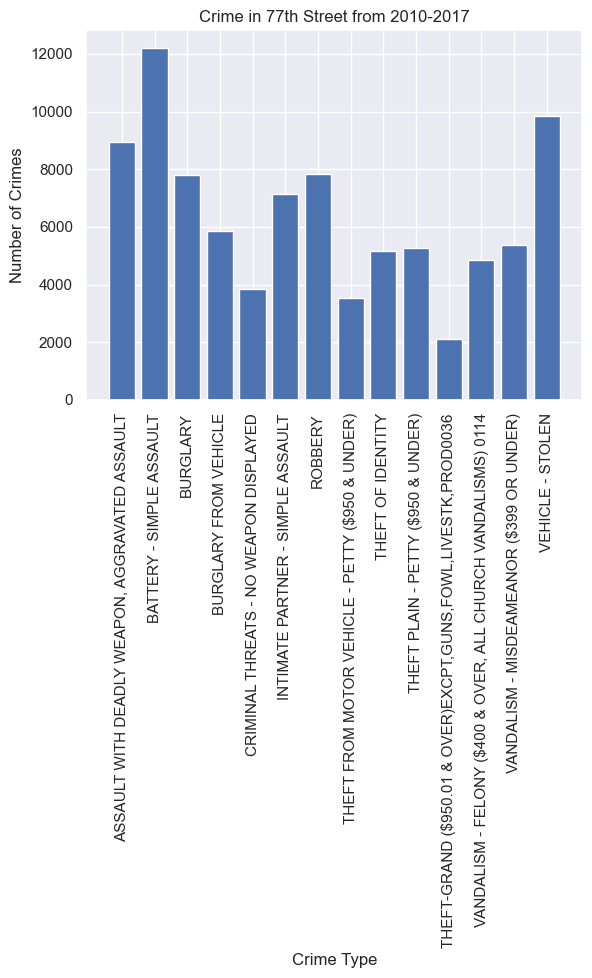

In [213]:
max_crime_codes = sorted_crime_data[sorted_crime_data['Area Name'] == '77th Street']
max_crime_types = max_crime_codes.groupby('Crime Code Description')
max_groups = max_crime_types.groups.keys()

max_x = []
max_y = []

for key in max_groups:
    group = max_crime_types.get_group(key)
    
    if len(group) > 2000:
        max_x.append(key)
        max_y.append(len(group))
    
plt.figure()
title = "Crime in 77th Street from 2010-2017"
plt.title(title)
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)

plt.bar(max_x, max_y)
plt.show()

From here we understand the types of crimes that 77th Street is most affected by: Battery-Simple Assault. 
This type of conclusion is essential for law enforcers and government officials. For enforcers, they can be more wary about these types of crimes since they are the most frequent. For government officials, they can start looking into solutions to address safety issues within the community. 

# Analyzing Crimes That Are Still Being Investigated

In this section, we will analyze crimes that still have an on-going investigation. First, we will create a new data frame that contains all the unique values of the "Status" column from the original crime data. Then, we will print out all the values of the "Status" column, shown below.

In [214]:
status = sorted_crime_data['Status Description'].unique()
print(*status, sep='\n')

Invest Cont
Adult Arrest
Adult Other
Juv Other
Juv Arrest
UNK


As seen above, there are 6 different values in the "Status Description" column.

Next, to grab the only the "Status Description" column, we will use the pandas `groupby()` function.

In [215]:
status_crimes = sorted_crime_data.groupby(sorted_crime_data['Status Description'])

Now, we will loop through the status data frame and print the number of crimes associated with each crime. Here is the output:

In [216]:
status_frequency = []

for stat in status: 
    status_df = status_crimes.get_group(stat)
    status_frequency.append(len(status_df.index))
    print("Status ", stat,"Number of Crimes: ", len(status_df.index))

Status  Invest Cont Number of Crimes:  1227180
Status  Adult Arrest Number of Crimes:  162424
Status  Adult Other Number of Crimes:  178175
Status  Juv Other Number of Crimes:  3889
Status  Juv Arrest Number of Crimes:  12619
Status  UNK Number of Crimes:  29


Now, let's plot the frequencies of the crimes per each status on a bar plot.

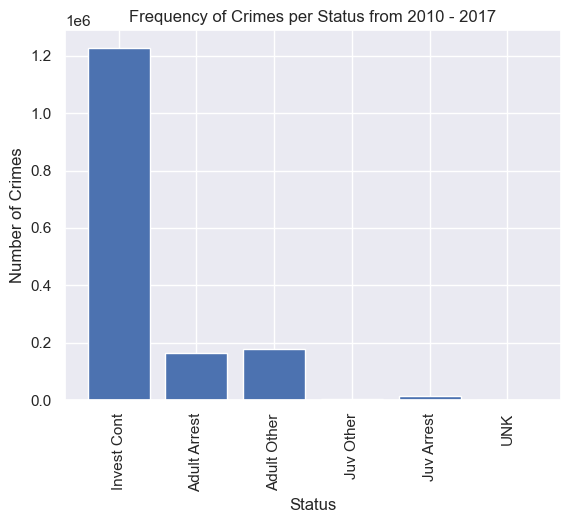

In [217]:
plt.figure()
plt.title("Frequency of Crimes per Status from 2010 - 2017")
plt.xlabel("Status")
plt.ylabel("Number of Crimes")
plt.bar(status, status_frequency)
plt.xticks(rotation=90)
plt.show()

Let's dive deeper into the "Invest Cont" value, which implies that there is an on-going investigations on those cases, and they haven't been solved yet. For this, we can use the `groupby()` function again to group the "Crime Code Description" column. We can also use the `get_group` function to group the "Invest Cont" with its Crime Code Description. 

In [218]:
#For each status that is "Invest Continues", graph the frequency of types of crime
status_crimes = sorted_crime_data.groupby(sorted_crime_data['Status Description'])['Crime Code Description']

inv_cont = status_crimes.get_group("Invest Cont")

Now, we are ready to plot the Crime Code Description frequencies for all of the on-going investigations.

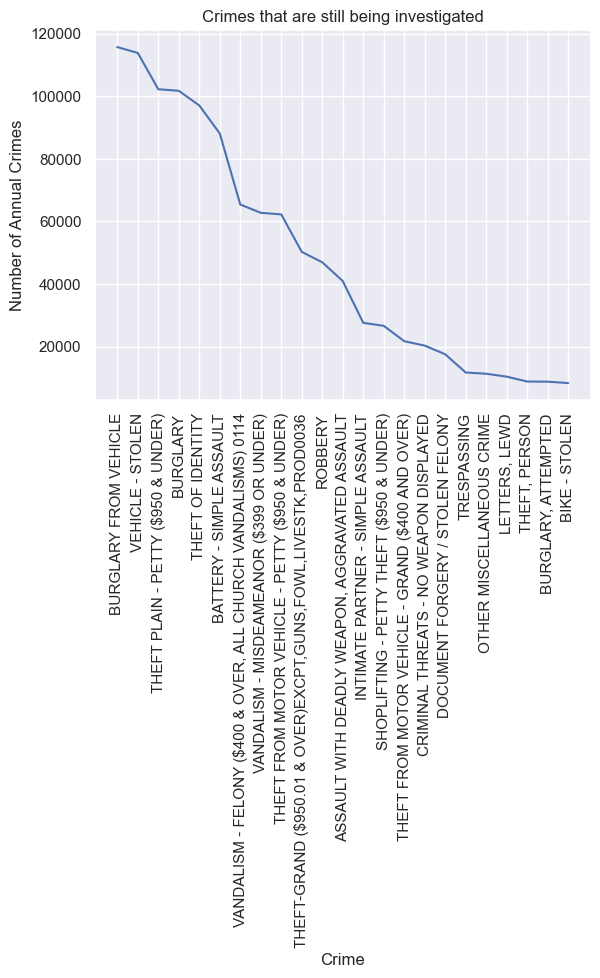

In [219]:
new_data = list(filter(lambda x: x > 8000, inv_cont.value_counts()))
x_val = inv_cont.value_counts().index[:len(new_data)]
plt.figure()

plt.title("Crimes that are still being investigated")
plt.xlabel('Crime')
plt.ylabel('Number of Annual Crimes')
plt.xticks(rotation=90)
plt.plot(x_val, new_data)
plt.show()

The results show that many of the ongoing investigations are thefts from and of vehicles. Theft of bicycles seem to be the most solved crime. This could be because it is much simpler to find someone who stole a bike vs. a vehicle. A person with a vehicle could travel far distances in a short amount of time, making the crime easier to get away with. Also, stolen posessions from vehicles would be a simple crime to get away with. 

Now, we can plot how many "Burglary From Vehicle" crimes there are total, to see the difference of how many are solved vs. unsolved. 

To do so, we'll separate the dataset to only take those that are related to "BURGLARY FROM VEHICLE". Then split this dataframe up to those who resulted in an Adult Arrest or those who still have an ongoing investigation. 

We'll group both dataframes by year to account for frequency, and plot with the results. 

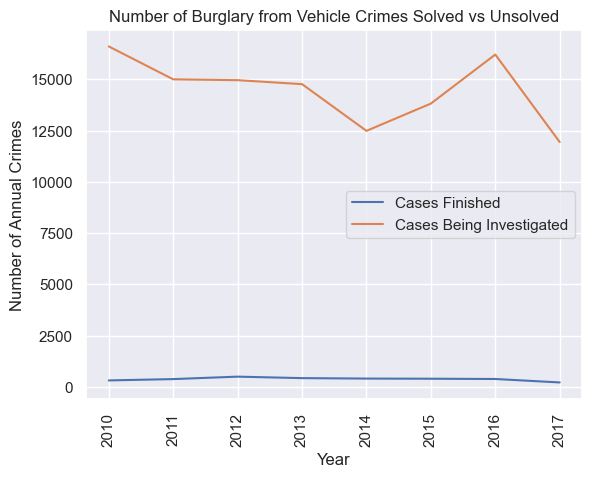

In [220]:
desc_crimes = sorted_crime_data[sorted_crime_data['Crime Code Description']=='BURGLARY FROM VEHICLE']

desc_crimes_finished = desc_crimes[desc_crimes['Status Description'] == 'Adult Arrest']
desc_crimes_cont = desc_crimes[desc_crimes['Status Description'] == 'Invest Cont']

desc_crimes_by_year_finished = desc_crimes_finished.groupby("Year")
desc_crimes_by_year_cont = desc_crimes_cont.groupby("Year")

burg_yr_keys = desc_crimes_by_year_cont.groups.keys()
burg_years = list(burg_yr_keys)

burg_frequency_finished = []
burg_frequency_cont = []

for year in burg_years: 
    burg_frequency_finished.append(len(desc_crimes_by_year_finished.get_group(year)))
    burg_frequency_cont.append(len(desc_crimes_by_year_cont.get_group(year)))

plt.figure()
plt.title("Number of Burglary from Vehicle Crimes Solved vs Unsolved")
plt.xlabel('Year')
plt.ylabel('Number of Annual Crimes')
plt.xticks(rotation=90)
plt.plot(burg_years, burg_frequency_finished, label='Cases Finished')
plt.plot(burg_years, burg_frequency_cont, label='Cases Being Investigated')
plt.legend()
plt.show()

As you can see, the number of cases solved is not even close to the number of cases being investigated. As an estimate, ~300 cases are solved each year for these crimes. However, there are almost >12,500 happening each year. This means that in each year, only 1% of these cases are solved, and the criminal was arrested. 

This is clearly an ongoing issue for over seven years, and data analysis like these can help emphasize how reform is needed to focus more on each of these burglaries every year.

## Relationship between Victim Age and Victim Sex

Another important relationship in this dataset is Victim Age and Victim Sex. Is there a direct relationship between the two? What type of profile is the typical victim in crimes in Los Angeles? For this relationship, we are testing to see that there is a relationshipo between victim age and victim sex. 

We can first start out with the Victim Age. Every year which age group is affected the most? 

To plot this data, we'll use the seaborn module.

Text(0, 0.5, 'Victim Age')

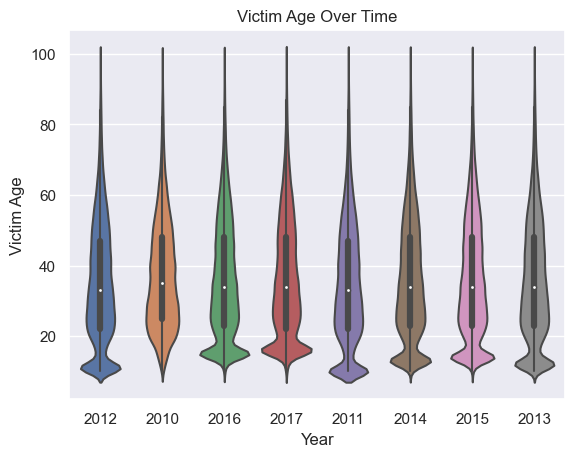

In [221]:
import seaborn

plt.figure()
seaborn.violinplot(x='Year',y='Victim Age', data=sorted_crime_data)
plt.title("Victim Age Over Time")
plt.xlabel("Year")
plt.ylabel("Victim Age")

This violin plot tells us that the victim age in 2010 was mostly prevalent in the younger age group, ranging from people in their 20s - 40s. As time went on, the age becomes more evenly distributed, while still targeting the younger generation. This could be the case because younger people are easier to target these types of crimes against. Additionally, there are crime codes that only involve kids such as "child neglection". So, this could explain why younger people are being targeted. 

Now what about victim sex? We'll do a line plot to see the differences between crime in women vs. men. 
Not every crime is associated with an age, therefore, we'll filter results to only include those that were provided by using `groupby`.

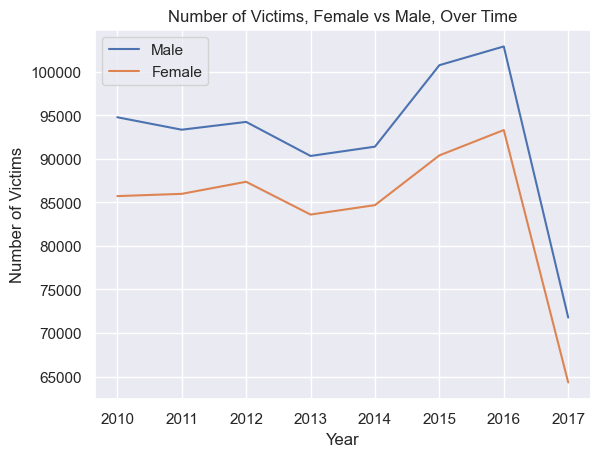

In [222]:
male_data = sorted_crime_data[sorted_crime_data['Victim Sex'] == 'M']
female_data = sorted_crime_data[sorted_crime_data['Victim Sex'] == 'F']

group_male = male_data.groupby("Year")
group_female = female_data.groupby("Year")

group_keys = group_female.groups.keys()
victim_years = list(group_keys)

male_victims = []
female_victims = []

for year in victim_years: 
    male_victims.append(len(group_male.get_group(year)))
    female_victims.append(len(group_female.get_group(year)))

plt.figure()
plt.title("Number of Victims, Female vs Male, Over Time")
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.plot(victim_years, male_victims, label='Male')
plt.plot(victim_years, female_victims, label='Female')
plt.legend()
plt.show()


Seeing the results, we can notice that overall throughout the years, there were more male victims than female victims from 2010-2017. 

The reason we want to graph this data is to see if Victim Sex can act as an interaction term for Victim Ages. To clarify our hypothesis, we'll start a regression model to include this interaction term. 

To perform regression models, we'll need to import the formula api from the statsmodels module.

A note to consider is that OLS works with dataframe headers that are one word. Therefore, we changed our headers from "Victim Sex" to "victim_sex" for this section of code.  

In [223]:
import statsmodels.formula.api as smf

male_data = sorted_crime_data[sorted_crime_data['Victim Sex'] == 'M']
female_data = sorted_crime_data[sorted_crime_data['Victim Sex'] == 'F']
victim_sorted_data = pd.concat([male_data, female_data])

victim_sorted_data.rename(columns = {'Victim Sex':'victim_sex'}, inplace = True)
victim_sorted_data.rename(columns = {'Victim Age':'victim_age'}, inplace = True)

res = smf.ols(formula='victim_age ~ Year * C(victim_sex)', data=victim_sorted_data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             victim_age   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     266.5
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:45:25   Log-Likelihood:            -5.5385e+06
No. Observations:             1323539   AIC:                         1.108e+07
Df Residuals:                 1323523   BIC:                         1.108e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

From the regression results, we can take a look at the p-values to determine if any p-value is considered significant. In this case, all the values are <0.05, suggesting that the confidence level is high. Therefore, there is a statistically significant relationship between Victim Sex and Victim Age. 

## Relationship between 'Date Reported' and 'Date Occurred'

With this data in mind we knew we wanted to also investigate the timelines of crime reports in Los Angeles. We noticed that there is a "Date Occurred" column as well as a "Date Reported" column. Although some crimes occurred and were reported on the same date it can also be seen that many were reported days and even years after the crimes were actually committed. To see this more clearly we added a column to the dataframe which repesents the number of days that passed between a crime was committed and it was reported.

In [224]:
sorted_crime_data[['Date Occurred','Date Reported']] = sorted_crime_data[['Date Occurred','Date Reported']].apply(pd.to_datetime) #if conversion required
sorted_crime_data['Days Btwn Occurrence & Report'] = (sorted_crime_data['Date Reported'] - sorted_crime_data['Date Occurred']).dt.days
sorted_crime_data['Year'] = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year
sorted_crime_data

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Year,Days Btwn Occurrence & Report
320224,121907264,2012-02-25,2010-01-01,900,19,Mission,1924,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,15100 PADDOCK ST,NaN,"(34.2954, -118.4612)",2010,785
319675,120125557,2012-12-19,2010-01-01,1200,1,Central,153,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)",2010,1083
260478,100628947,2010-12-03,2010-01-01,800,6,Hollywood,649,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,1600 N NORMANDIE AV,NaN,"(34.1004, -118.3005)",2010,336
319676,120126065,2012-12-28,2010-01-01,1200,1,Central,174,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,700 S MAIN ST,NaN,"(34.0439, -118.2514)",2010,1092
319677,120204097,2012-01-02,2010-01-01,1,2,Rampart,248,121,"RAPE, FORCIBLE",1259 0500,...,Adult Arrest,121.0,NaN,NaN,NaN,300 WITMER ST,NaN,"(34.0591, -118.2635)",2010,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429053,172004038,2017-01-01,2016-12-31,1800,20,Olympic,2033,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,Invest Cont,740.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,"(34.0617, -118.3066)",2016,1
1429055,172004047,2016-12-31,2016-12-31,2215,20,Olympic,2027,210,ROBBERY,0342 0432 0355 0344 0377 0334 1017 1205,...,Invest Cont,210.0,NaN,NaN,NaN,WILSHIRE BL,NEW HAMPSHIRE AV,"(34.0618, -118.2929)",2016,0
1428677,171804182,2016-12-31,2016-12-31,2145,18,Southeast,1864,626,INTIMATE PARTNER - SIMPLE ASSAULT,0345 1814 2000 0446,...,Adult Other,626.0,NaN,NaN,NaN,900 E 118TH ST,NaN,"(33.9267, -118.2586)",2016,0
1429058,172004060,2017-01-02,2016-12-31,1200,20,Olympic,2058,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 0311,...,Invest Cont,740.0,NaN,NaN,NaN,2600 W OLYMPIC BL,NaN,"(34.0537, -118.2878)",2016,2


We first displayed this data as a scatter plot to examine how varied the day between crime occurrence and report have been throughout the years.

Text(0.5, 0, 'Year')

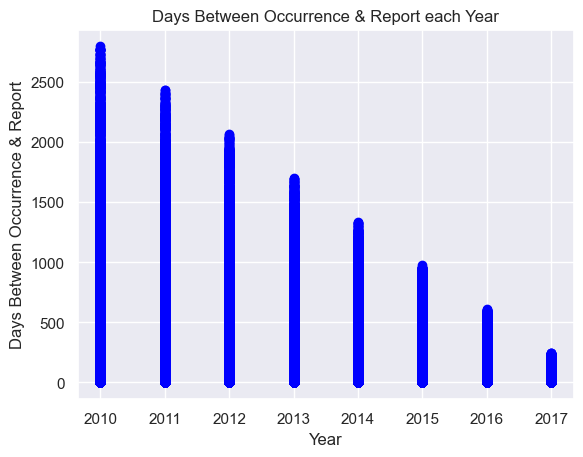

In [225]:
plt.scatter(sorted_crime_data['Year'],sorted_crime_data['Days Btwn Occurrence & Report'], color = 'blue')
plt.title("Days Between Occurrence & Report each Year")
plt.ylabel("Days Between Occurrence & Report")
plt.xlabel("Year")

There appears to have been so many crimes with so many varying days that the distribtuions look like lines rather than individual points. This tells us another graph could show this data better and allow us to make more concrete conclusions. One thing this graph does show us, however, is that the number of days that pass between a crime occurring and it being reported discreases significantly each year.

In [226]:
day_crimes = sorted_crime_data.groupby(sorted_crime_data['Year'])
day_crimes

day_frequency = []
years = sorted_crime_data['Year'].unique()
for yr in years: 
    day_crime_df = day_crimes.get_group(yr)
    print("Year: ", yr,"Number of Days: ", day_crime_df['Days Btwn Occurrence & Report'].max())

Year:  2010 Number of Days:  2796
Year:  2011 Number of Days:  2433
Year:  2012 Number of Days:  2067
Year:  2013 Number of Days:  1704
Year:  2014 Number of Days:  1332
Year:  2015 Number of Days:  978
Year:  2016 Number of Days:  614
Year:  2017 Number of Days:  249


In 2010, over 2500 days had passed between some crimes occurring and being reported (the greatest number of days being 2796 days). By 2017, no crime went unreported for more than 249 days (the least number of days being 0 days).

In [227]:
sorted_crime_data[["Year", "Days Btwn Occurrence & Report"]].groupby("Year").mean()

,Days Btwn Occurrence & Report
Year,
2010,26.358133
2011,24.452497
2012,20.264720
2013,17.816660
2014,15.629998
2015,12.172100
2016,8.418131
2017,4.053719


This is the average number of days between crimes occurring and being reported in LA from 2010 to 2017. This gives concrete decreasing values to conclude upon. We can once again conclude that the number of days crimes in Los Angeles went unreported decreased each year.

In [228]:
from sklearn.linear_model import LinearRegression

We'd like to fit a linear regression model of Days btwn Occurrence & Report vs. Year (treating it as a continuous variable), and test for a relationship between year and the number of days the crime went unreported.

In [229]:
reg = LinearRegression().fit(np.array(sorted_crime_data['Year']).reshape(-1, 1), np.array(sorted_crime_data['Days Btwn Occurrence & Report']).reshape(-1, 1) )
# print(reg.coef_)
# print(reg.intercept_)
print("y = 6255.36303317 - 3.09867438x")

y = 6255.36303317 - 3.09867438x


This is a predictor equation if you plug in a year between 2010 and 2017 into x it should predict the number of days a crime went unreported that year.

In [230]:
days2010 = 6255.36303317 - 3.09867438*2010
days2011 = 6255.36303317 - 3.09867438*2011
days2012 = 6255.36303317 - 3.09867438*2012
days2013 = 6255.36303317 - 3.09867438*2013
days2014 = 6255.36303317 - 3.09867438*2014
days2015 = 6255.36303317 - 3.09867438*2015
days2016 = 6255.36303317 - 3.09867438*2016
days2017 = 6255.36303317 - 3.09867438*2017

print("2010 predicts: " + str(days2010) + " days")
print("2011 predicts: " + str(days2011) + " days")
print("2012 predicts: " + str(days2012) + " days")
print("2013 predicts: " + str(days2013) + " days")
print("2014 predicts: " + str(days2014) + " days")
print("2015 predicts: " + str(days2015) + " days")
print("2016 predicts: " + str(days2016) + " days")
print("2017 predicts: " + str(days2017) + " days")

2010 predicts: 27.027529369999684 days
2011 predicts: 23.928854990000218 days
2012 predicts: 20.830180609999843 days
2013 predicts: 17.731506230000377 days
2014 predicts: 14.632831850000002 days
2015 predicts: 11.534157469999627 days
2016 predicts: 8.435483090000162 days
2017 predicts: 5.3368087099997865 days


Next, we decided to explore the relationship between the Days Between Occurence & Report and each Area.

In [231]:
sorted_crime_data[["Year","Area Name","Days Btwn Occurrence & Report"]].groupby(["Year", "Area Name"]).mean()

Days Btwn Occurrence & Report
Year Area Name                                 
2010 77th Street                      25.266135
     Central                          19.351836
     Devonshire                       23.201981
     Foothill                         34.853596
     Harbor                           21.973013
...                                         ...
2017 Topanga                           5.055170
     Van Nuys                          5.164216
     West LA                           4.918836
     West Valley                       4.970433
     Wilshire                          4.661293

[168 rows x 1 columns]

These are the average days between crime occurrence and report for each area for each year.

In [232]:
sorted_crime_data[["Area Name","Days Btwn Occurrence & Report"]].groupby("Area Name").mean()

,Days Btwn Occurrence & Report
Area Name,
77th Street,14.846553
Central,11.265351
Devonshire,17.571683
Foothill,22.637933
Harbor,13.460467
Hollenbeck,15.258612
Hollywood,14.406124
Mission,20.317587
N Hollywood,18.874683


These are the average days between crime occurrence and report for each area for the entire dataframe from the year 2010 up until 2017. Foothill on average had the most number of days unreported (22.637933 days) during this time period whereas Central on average had the least number of days unreported (11.265351 days) during this time period.

In [233]:
import seaborn as sns

To visualize this data, we're going to use the seaborn barplot function.

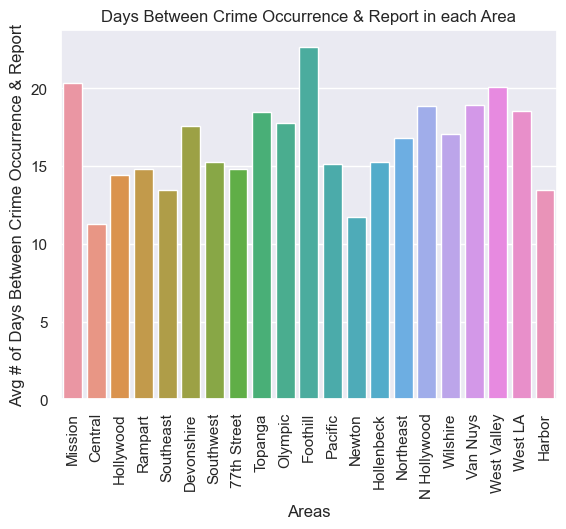

In [234]:
grouped_data = sorted_crime_data.groupby(sorted_crime_data['Area Name'])
areas = sorted_crime_data['Area Name'].unique()

days = []
for area in areas:
    area_df = grouped_data.get_group(area)
    days.append(area_df["Days Btwn Occurrence & Report"].mean())

sns.set()
fig = sns.barplot(x=areas,y=days)
plt.xticks(rotation=90)
plt.xlabel("Areas")
plt.ylabel("Avg # of Days Between Crime Occurrence & Report")
plt.title("Days Between Crime Occurrence & Report in each Area")
plt.show(fig)

This shows Foothill clearly has the highest average number of days unreported. It also shows Central and Newton have much lower average number of days unreported than the other areas.  

We'd also like to discretize this entire time period into eight time periods, each year, from 2010 to 2017. This can be done by grouping the 'Date Occurred" variable by it datetime "year" value. This allows us to select each year and analyze it accordingly.

In [235]:
year_crimes = sorted_crime_data.groupby(pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year)
year_crimes
year_crimes.get_group(2010)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Year,Days Btwn Occurrence & Report
320224,121907264,2012-02-25,2010-01-01,900,19,Mission,1924,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,15100 PADDOCK ST,NaN,"(34.2954, -118.4612)",2010,785
319675,120125557,2012-12-19,2010-01-01,1200,1,Central,153,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)",2010,1083
260478,100628947,2010-12-03,2010-01-01,800,6,Hollywood,649,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,1600 N NORMANDIE AV,NaN,"(34.1004, -118.3005)",2010,336
319676,120126065,2012-12-28,2010-01-01,1200,1,Central,174,354,THEFT OF IDENTITY,0377,...,Invest Cont,354.0,NaN,NaN,NaN,700 S MAIN ST,NaN,"(34.0439, -118.2514)",2010,1092
319677,120204097,2012-01-02,2010-01-01,1,2,Rampart,248,121,"RAPE, FORCIBLE",1259 0500,...,Adult Arrest,121.0,NaN,NaN,NaN,300 WITMER ST,NaN,"(34.0591, -118.2635)",2010,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236469,100401758,2010-12-31,2010-12-31,2000,4,Hollenbeck,453,310,BURGLARY,0344 1402 1607,...,Invest Cont,310.0,998.0,NaN,NaN,1700 PENNSYLVANIA AV,NaN,"(34.0486, -118.2192)",2010,0
203487,111605523,2011-02-02,2010-12-31,1000,16,Foothill,1691,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,Invest Cont,440.0,NaN,NaN,NaN,12600 WILLARD ST,NaN,"(34.2189, -118.4076)",2010,33
312269,102000597,2010-12-31,2010-12-31,508,20,Olympic,2035,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0304 2001 2002 0342 0411 0416 0432 0913 0446 0421,...,Adult Arrest,230.0,998.0,NaN,NaN,700 S MARIPOSA AV,NaN,"(34.0598, -118.2987)",2010,0
222845,100223078,2010-12-31,2010-12-31,400,2,Rampart,246,210,ROBBERY,0344 0400 0416,...,Invest Cont,210.0,NaN,NaN,NaN,6TH,ALVARADO,"(34.0596, -118.2749)",2010,0


For each year we grouped by 'Area Name' and and then made a scatterplot showing Number of Crimes (y-axis) vs. mean Days Unreported (x-axis) for each of the eight years. We've added a regression line (using NumPy's polyfit) in each scatter plot to ease interpretation.

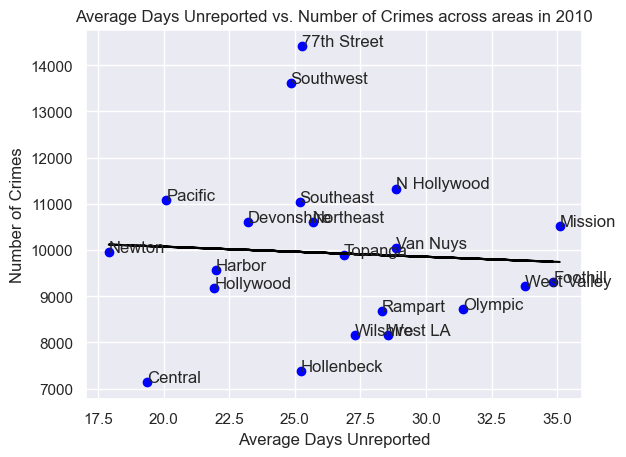

In [236]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2010
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'blue')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2010')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2010, there is a weak negative relationship between Crime Number and the number of days unreported.

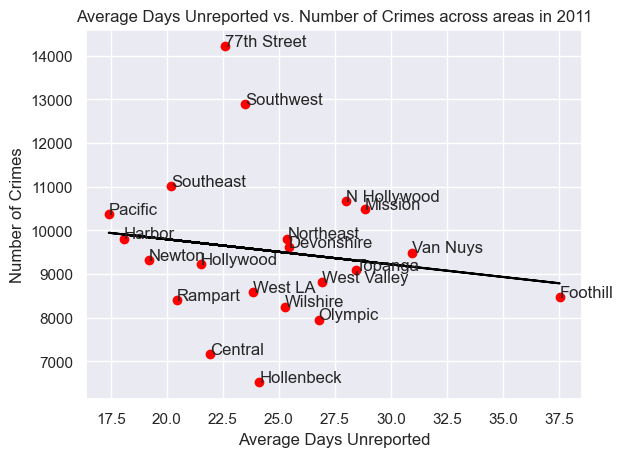

In [237]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2011
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'red')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2011')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2011, there is a moderate negative relationship between Crime Number and the number of days unreported.

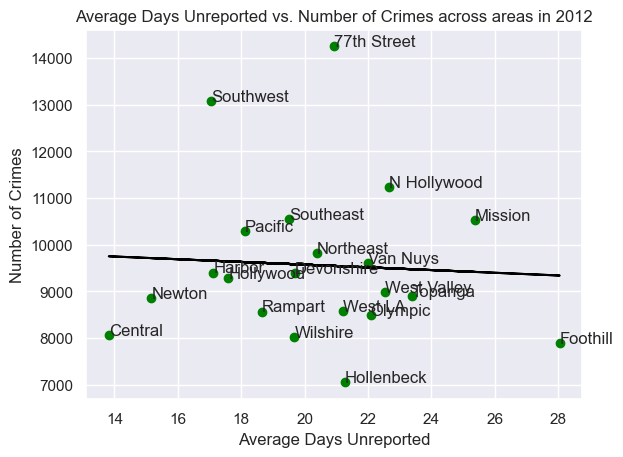

In [238]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2012
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'green')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2012')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2012, there is a moderately strong negative relationship between Crime Number and the number of days unreported.

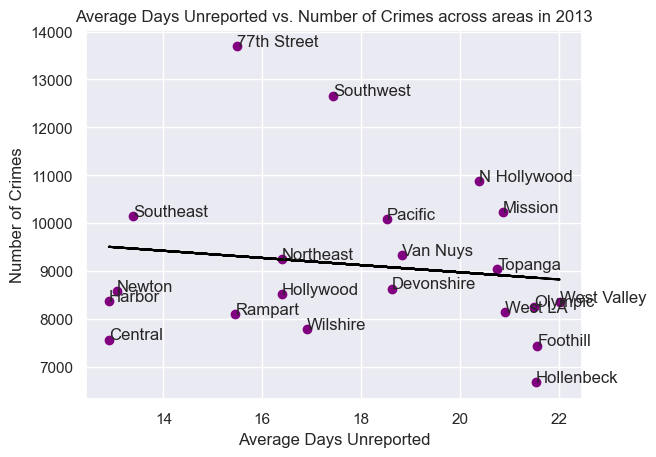

In [239]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2013
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'purple')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2013')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2013, there is a moderate negative relationship between Crime Number and the number of days unreported.

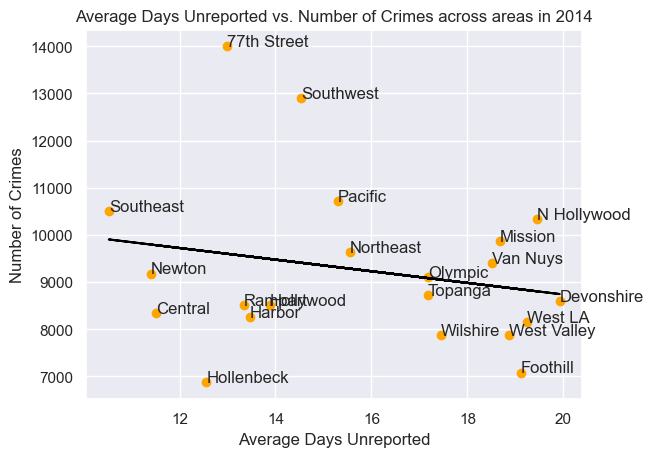

In [240]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2014
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'orange')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2014')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2014, there is a moderate negative relationship between Crime Number and the number of days unreported.

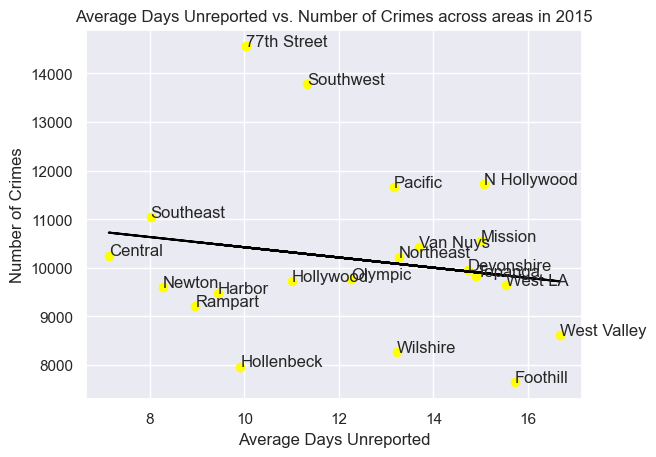

In [241]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2015
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'yellow')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2015')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2015, there is a moderately weak negative relationship between Crime Number and the number of days unreported.

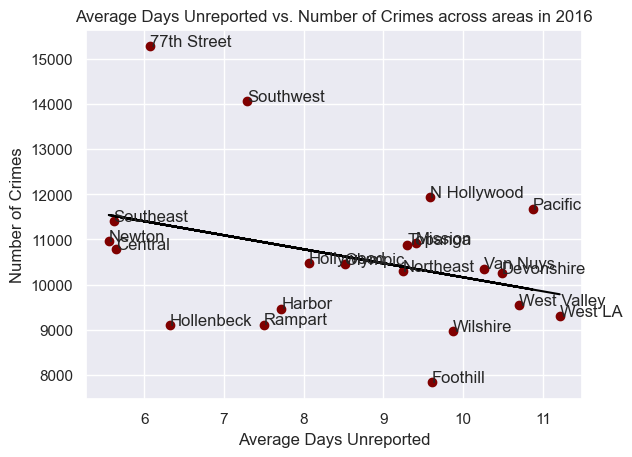

In [242]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2016
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'maroon')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2016')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2016, there is a moderatel negative relationship between Crime Number and the number of days unreported.

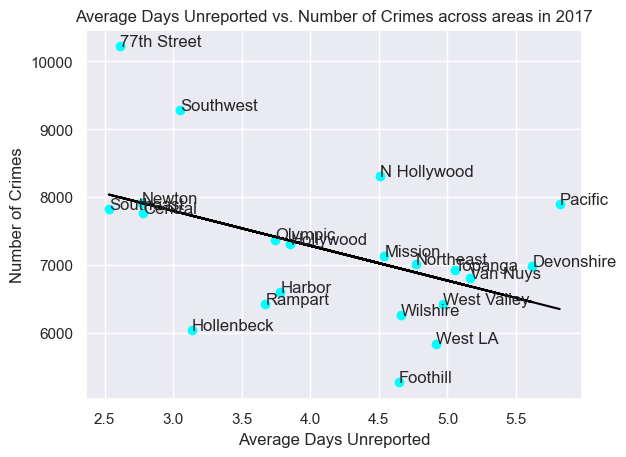

In [243]:
#grab only part of table in this time period
tf1 = pd.to_datetime(sorted_crime_data['Date Occurred']).dt.year == 2017
tb1 = sorted_crime_data[tf1]
group1 = tb1.groupby('Area Name')
arrx1 = []
arry1 = []
#For each unique area in this period find crime number and average report time
for area in pd.unique(tb1['Area Name']):
    areatable = group1.get_group(area)
    avgDay = areatable['Days Btwn Occurrence & Report'].mean()
    numCrime = areatable['Area Name'].count()
    arrx1.append(avgDay)
    arry1.append(numCrime)
    plt.scatter(avgDay, numCrime, color = 'aqua')
    plt.annotate(area, xy =(avgDay, numCrime))
m1, b1 = np.polyfit(arrx1, arry1, 1)
plt.plot(arrx1, m1*np.array(arrx1)+b1, color = 'black')
plt.title('Average Days Unreported vs. Number of Crimes across areas in 2017')
plt.xlabel("Average Days Unreported")
plt.ylabel("Number of Crimes")
plt.show()

In 2011, there is a moderate negative relationship between Crime Number and the number of days unreported.

Plot Analysis:
In 2010, Foothill, West Valley, and Mission had the highest average days unreported while Newton, Central, and Pacific had the lowest average days unreported.

In 2017, Pacific, Devonshire, and Van Nuys had the highest average days unreported while 77th Street, Southeast, Central, and Newton had the lowest average days unreported.

Although Pacific went from an area with one of the lowest average days unreported to an area with one of the highest average days unreported, you can see on the plots that it's average days unreported still decreased significantly from 2010 to 2017.

77th Street has a consistently high number of crimes across all eight time periods however it also remains in the lower half of average unreported days compared to the other areas in LA.
The Southeast has consistently remained an area with some of the lowest averages for days unreported but has also remained middle of the pack when it comes to its number of crimes per year.
West LA seems to always have some of the greatest averages for number of days unreported, however, it also remained on the lower half of each plot when it came to number of crimes. 

It is once again reflected in this plots that as the years went on the average number of days unreported decreases. A new observation we found is that it also appears that the lower the number of crimes in the area, the longer it took on average for any crime to be reported.